<a href="https://colab.research.google.com/github/Yospy/Netflix-Stock-Prediction/blob/main/Netflix_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/NFLX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-26,502.820007,508.720001,496.679993,508.049988,508.049988,3467800
1,2021-03-29,505.660004,518.000000,504.399994,513.950012,513.950012,3330000
2,2021-03-30,510.510010,514.409973,506.910004,513.390015,513.390015,2418100
3,2021-03-31,515.669983,528.130005,515.440002,521.659973,521.659973,3503100
4,2021-04-01,529.929993,540.500000,527.030029,539.419983,539.419983,3938600


In [4]:
#number of trading days
df.shape

(254, 7)

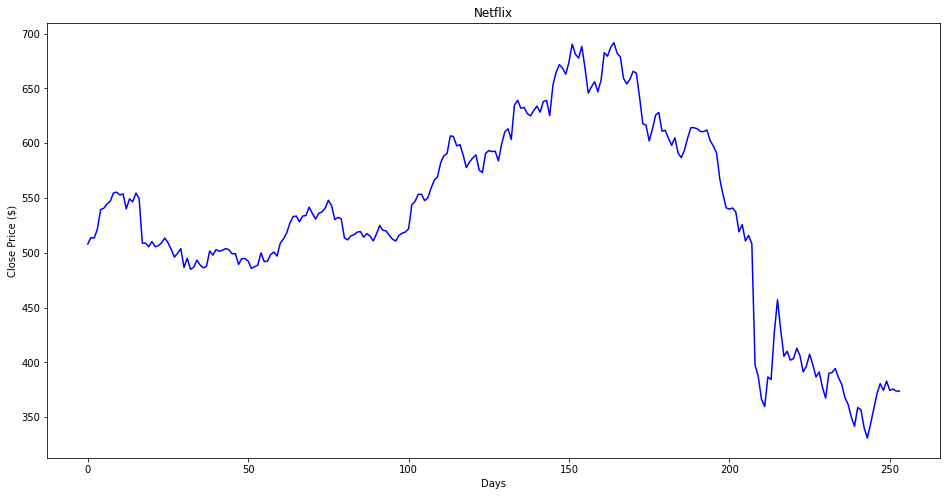

In [5]:
plt.figure(figsize=(16,8))
plt.xlabel("Days")
plt.ylabel("Close Price ($)")
plt.title("Netflix")
plt.plot(df['Close'],color='b')

In [7]:
#get the close price
price = df[['Close']]
price.head()

,Close
0,508.049988
1,513.950012
2,513.390015
3,521.659973
4,539.419983


In [9]:
future_days = 30
price['Prediction'] = price[['Close']].shift(-future_days)
price.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Close,Prediction
249,382.920013,NaN
250,374.489990,NaN
251,375.709991,NaN
252,373.850006,NaN
253,373.850006,NaN


In [10]:
X = array(price.drop(['Prediction'],1))[:-future_days]
X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


array([[508.049988],
       [513.950012],
       [513.390015],
       [521.659973],
       [539.419983],
       [540.669983],
       [544.530029],
       [546.98999 ],
       [554.580017],
       [555.309998],
       [552.780029],
       [553.72998 ],
       [540.02002 ],
       [549.219971],
       [546.539978],
       [554.440002],
       [549.570007],
       [508.899994],
       [508.779999],
       [505.549988],
       [510.299988],
       [505.549988],
       [506.519989],
       [509.      ],
       [513.469971],
       [509.109985],
       [503.179993],
       [496.079987],
       [499.549988],
       [503.839996],
       [486.690002],
       [495.079987],
       [484.980011],
       [486.660004],
       [493.369995],
       [488.940002],
       [486.279999],
       [487.700012],
       [501.670013],
       [497.890015],
       [502.899994],
       [501.339996],
       [502.359985],
       [503.859985],
       [502.809998],
       [499.079987],
       [499.23999 ],
       [489.4

In [11]:
y = array(price['Prediction'])[:-future_days]
y

array([486.690002, 495.079987, 484.980011, 486.660004, 493.369995,
       488.940002, 486.279999, 487.700012, 501.670013, 497.890015,
       502.899994, 501.339996, 502.359985, 503.859985, 502.809998,
       499.079987, 499.23999 , 489.429993, 494.73999 , 494.660004,
       492.390015, 485.809998, 487.269989, 488.769989, 499.890015,
       491.899994, 492.410004, 498.339996, 500.769989, 497.      ,
       508.820007, 512.73999 , 518.059998, 527.070007, 533.030029,
       533.5     , 528.210022, 533.539978, 533.97998 , 541.640015,
       535.960022, 530.76001 , 535.97998 , 537.309998, 540.679993,
       547.950012, 542.950012, 530.309998, 532.280029, 531.049988,
       513.630005, 511.769989, 515.409973, 516.48999 , 518.909973,
       519.299988, 514.25    , 517.570007, 515.150024, 510.820007,
       517.349976, 524.890015, 520.549988, 519.969971, 515.840027,
       512.400024, 510.720001, 515.919983, 517.919983, 518.909973,
       521.869995, 543.710022, 546.880005, 553.330017, 553.409

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [15]:
tree = DecisionTreeRegressor()
lr = LinearRegression()
tree.fit(X_train, y_train)
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
X_future = price.drop(['Prediction'],1)[:-future_days]
X_future = X_future.tail(future_days)
X_future = array(X_future)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [17]:
X_future

array([[602.440002],
       [597.369995],
       [591.150024],
       [567.52002 ],
       [553.289978],
       [541.059998],
       [539.849976],
       [540.840027],
       [537.219971],
       [519.200012],
       [525.690002],
       [510.799988],
       [515.859985],
       [508.25    ],
       [397.5     ],
       [387.149994],
       [366.420013],
       [359.700012],
       [386.700012],
       [384.359985],
       [427.140015],
       [457.130005],
       [429.480011],
       [405.600006],
       [410.170013],
       [402.100006],
       [403.529999],
       [412.890015],
       [406.269989],
       [391.309998]])

In [18]:
tree_p = tree.predict(X_future)
lr_p = lr.predict(X_future)
print(tree_p)
print()
print(lr_p)
print()

[396.570007 653.159973 398.079987 624.940002 634.809998 390.029999
 367.459991 390.029999 390.799988 394.519989 589.349976 380.029999
 368.070007 361.730011 350.26001  341.76001  356.769989 356.769989
 340.320007 340.320007 343.75     511.769989 343.75     380.600006
 374.589996 382.920013 374.48999  375.709991 380.600006 373.850006]

[573.14253636 569.59903293 565.25180252 548.73644065 538.79085227
 530.24313703 529.39743462 530.08939602 527.55928494 514.96486711
 519.50081782 509.09396518 512.63047247 507.31174057 429.90691544
 422.67314204 408.18464945 403.48794062 422.35864291 420.72316318
 450.62276355 471.5832144  452.25822162 435.56813032 438.7621763
 433.12192817 434.12137159 440.66322623 436.03639142 425.58063081]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


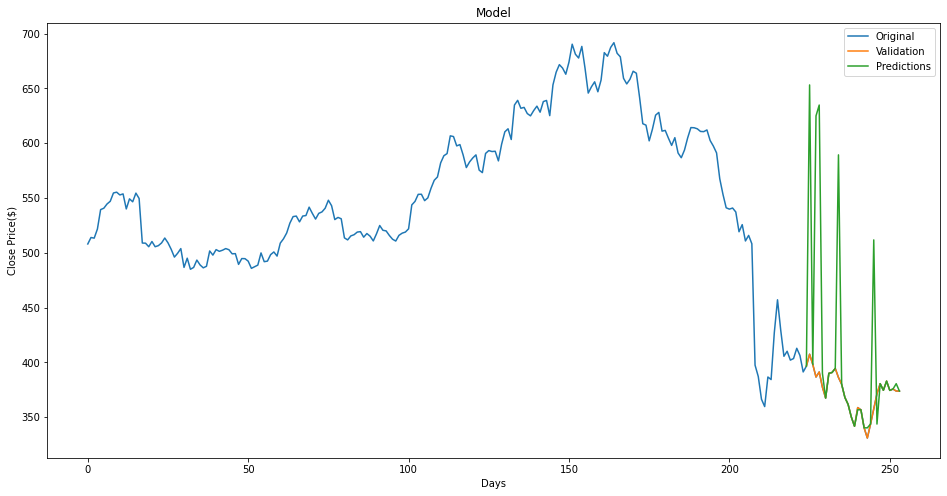

In [20]:
predictions = tree_p 
valid = price[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close Price($)")
plt.plot(price['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Validation', 'Predictions'])
plt.show()